In [2]:
import pandas as pd
import seaborn as sns
import itertools

In [88]:
agg_by_sub = pd.read_csv('../data/curated/2022_aggregated/agg_bed_avgPrice_sub.csv')
agg_by_sub

,beds,avg_price,count,propertyType,suburb,median
0,1,500.0,1,Acreage / Semi-Rural,Oaklands Junction,500.0
1,1,401.0,15,Apartment / Unit / Flat,Abbotsford,410.0
2,1,290.0,1,Apartment / Unit / Flat,Airport West,290.0
3,1,417.5,2,Apartment / Unit / Flat,Albert Park,417.5
4,1,320.0,2,Apartment / Unit / Flat,Alphington,320.0
...,...,...,...,...,...,...
2930,7,1250.0,1,House,Brunswick,1250.0
2931,7,170.0,1,House,Dandenong,170.0
2932,8,1950.0,1,House,Balaclava,1950.0
2933,8,1300.0,1,House,Mordialloc,1300.0


In [89]:
agg_flat = agg_by_sub[agg_by_sub['propertyType'] == 'Apartment / Unit / Flat']
agg_flat

,beds,avg_price,count,propertyType,suburb,median
1,1,401.0,15,Apartment / Unit / Flat,Abbotsford,410.0
2,1,290.0,1,Apartment / Unit / Flat,Airport West,290.0
3,1,417.5,2,Apartment / Unit / Flat,Albert Park,417.5
4,1,320.0,2,Apartment / Unit / Flat,Alphington,320.0
5,1,390.0,2,Apartment / Unit / Flat,Altona,390.0
...,...,...,...,...,...,...
2193,4,1975.0,1,Apartment / Unit / Flat,St Kilda,1975.0
2194,4,490.0,1,Apartment / Unit / Flat,Wantirna South,490.0
2753,5,595.0,1,Apartment / Unit / Flat,Clayton,595.0
2754,5,750.0,1,Apartment / Unit / Flat,Montmorency,750.0


#### Checking to see how many matching suburb we have for scraped data from domain and historical data

In [90]:
query = 'SELECT * FROM bed_1_flat INNER JOIN agg_flat on bed_1_flat.suburb = agg_flat.suburb AND agg_flat.beds = 1'
joined = pysqldf(query)

In [91]:
joined

,Unnamed: 0,suburb,Mar-00,Unnamed: 3,Jun-00,Unnamed: 5,Sep-00,Unnamed: 7,Dec-00,Unnamed: 9,...,Dec-20,Unnamed: 169,Mar-21,Unnamed: 171,beds,avg_price,count,propertyType,suburb,median
0,Outer Western Melbourne,Altona,87,$95,93,$100,96,$105,97,$105,...,84,$290,86,$280,1,390.000000,2,Apartment / Unit / Flat,Altona,390.0
1,None,Armadale,210,$150,210,$150,211,$155,211,$160,...,184,$350,206,$350,1,447.500000,4,Apartment / Unit / Flat,Armadale,455.0
2,Inner Eastern Melbourne,Balwyn,12,$145,12,$150,16,$150,17,$140,...,64,$360,71,$350,1,470.000000,1,Apartment / Unit / Flat,Balwyn,470.0
3,Bendigo,Bendigo,84,$85,79,$85,85,$90,84,$90,...,32,$235,35,$230,1,250.000000,3,Apartment / Unit / Flat,Bendigo,280.0
4,None,Bentleigh,154,$125,163,$128,151,$130,146,$130,...,218,$320,201,$300,1,377.500000,2,Apartment / Unit / Flat,Bentleigh,377.5
5,None,Blackburn,53,$120,49,$125,53,$125,57,$130,...,130,$350,142,$344,1,358.750000,4,Apartment / Unit / Flat,Blackburn,360.0
6,None,Boronia,13,$100,11,$115,16,$115,18,$115,...,32,$328,36,$330,1,250.000000,1,Apartment / Unit / Flat,Boronia,250.0
7,None,Box Hill,74,$126,85,$130,87,$135,92,$135,...,649,$295,559,$320,1,295.000000,14,Apartment / Unit / Flat,Box Hill,260.0
8,None,Brighton,29,$185,36,$163,43,$160,40,$163,...,65,$400,65,$390,1,407.500000,4,Apartment / Unit / Flat,Brighton,415.0
9,None,Brunswick,407,$120,462,$120,479,$120,477,$120,...,500,$350,489,$340,1,383.611111,18,Apartment / Unit / Flat,Brunswick,380.0


In [3]:
df_1bed_flat = pd.read_csv('../data/curated/Rental_Price_historical/joined_1_bed_flat_monetary.csv')
bed_2_flat = pd.read_csv('../data/curated/Rental_Price_historical/joined_bed_2_flat_monetary.csv')
bed_2_house = pd.read_csv('../data/curated/Rental_Price_historical/joined_bed_2_house_monetary.csv')
bed_3_flat = pd.read_csv('../data/curated/Rental_Price_historical/joined_bed_3_flat_monetary.csv')
bed_3_house = pd.read_csv('../data/curated/Rental_Price_historical/joined_bed_3_house_monetary.csv')
bed_4_house = pd.read_csv('../data/curated/Rental_Price_historical/joined_bed_4_house_monetary.csv')

In [33]:
df_1bed_flat.columns[1:89]

Index(['Count_Mar2000', 'Median_Mar2000', 'Count_Jun2000', 'Median_Jun2000',
       'Count_Sep2000', 'Median_Sep2000', 'Count_Dec2000', 'Median_Dec2000',
       'Count_Mar2001', 'Median_Mar2001', 'Count_Jun2001', 'Median_Jun2001',
       'Count_Sep2001', 'Median_Sep2001', 'Count_Dec2001', 'Median_Dec2001',
       'Count_Mar2002', 'Median_Mar2002', 'Count_Jun2002', 'Median_Jun2002',
       'Count_Sep2002', 'Median_Sep2002', 'Count_Dec2003', 'Median_Dec2003',
       'Count_Mar2003', 'Median_Mar2003', 'Count_Jun2003', 'Median_Jun2003',
       'Count_Sep2003', 'Median_Sep2003', 'Count_Dec2003.1',
       'Median_Dec2003.1', 'Count_Mar2004', 'Median_Mar2004', 'Count_Jun2004',
       'Median_Jun2004', 'Count_Sep2004', 'Median_Sep2004', 'Count_Dec2004',
       'Median_Dec2004', 'Count_Mar2005', 'Median_Mar2005', 'Count_Jun2005',
       'Median_Jun2005', 'Count_Sep2005', 'Median_Sep2005', 'Count_Dec2005',
       'Median_Dec2005', 'Count_Mar2006', 'Median_Mar2006', 'Count_Jun2006',
       'Media

In [4]:
bed_4_house

,Suburb,Count_Mar2000,Median_Mar2000,Count_Jun2000,Median_Jun2000,Count_Sep2000,Median_Sep2000,Count_Dec2000,Median_Dec2000,Count_Mar2001,...,Average_household_size_2014,Average_household_size_2015,Average_household_size_2016,Average_household_size_2017,Average_household_size_2018,Average_household_size_2019,Average_household_size_2020,Average_household_size_2021,Suburb.1,Postcode.1
0,Albert Park-Middle Park-West St Kilda,19,$500,21,$550,24,$525,22,$513,24,...,2.773333,2.653333,3.0,2.413333,2.293333,2.173333,2.053333,1.7,Scoresby,3182
1,Armadale,10,$615,11,$695,13,$850,13,$695,15,...,2.640000,2.570000,2.8,2.430000,2.360000,2.290000,2.220000,2.0,Lilydale,3143
2,Carlton North,59,$380,58,$380,56,$383,53,$385,48,...,1.360000,1.330000,0.0,1.270000,1.240000,1.210000,1.180000,1.8,"Hotham Hill, North Melbourne",3053
3,Carlton-Parkville,25,$450,25,$430,39,$450,42,$425,44,...,2.706667,2.636667,2.8,2.496667,2.426667,2.356667,2.286667,2.1,"Attwood, Westmeadows",3052
4,CBD-St Kilda Rd,-,-,-,-,-,-,-,-,-,...,2.773333,2.653333,3.0,2.413333,2.293333,2.173333,2.053333,1.7,Scoresby,3182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Torquay,36,$198,38,$200,37,$200,32,$215,37,...,2.560000,2.580000,2.6,2.620000,2.640000,2.660000,2.680000,2.7,Ocean Grove,3228
140,Traralgon,64,$183,58,$180,52,$175,47,$175,48,...,2.233333,2.233333,1.9,2.233333,2.233333,2.233333,2.233333,2.4,Nicholson,3844
141,Warragul,38,$178,38,$180,37,$180,35,$185,33,...,2.546667,2.556667,2.8,2.576667,2.586667,2.596667,2.606667,2.5,"Valencia Creek, Briagolong, Coongulla, Maffra,...",3820
142,Warrnambool,85,$170,87,$180,82,$185,74,$188,76,...,2.773333,2.703333,2.6,2.563333,2.493333,2.423333,2.353333,2.3,"Bushfield, Grassmere, Winslow, Woodford",3280


In [10]:
df_1bed_flat.drop(df_1bed_flat.columns[1:89], axis=1, inplace = True)
df_1bed_flat

,Suburb,Count_Mar2011,Median_Mar2011,Count_Jun2011,Median_Jun2011,Count_Sep2011,Median_Sep2011,Count_Dec2011,Median_Dec2011,Count_Mar2012,...,Average_household_size_2014,Average_household_size_2015,Average_household_size_2016,Average_household_size_2017,Average_household_size_2018,Average_household_size_2019,Average_household_size_2020,Average_household_size_2021,Suburb.1,Postcode.1
0,Albert Park-Middle Park-West St Kilda,298,$315,295,$320,277,$320,292,$325,296,...,2.773333,2.653333,3.0,2.413333,2.293333,2.173333,2.053333,1.7,Scoresby,3182
1,Armadale,174,$293,178,$298,180,$300,179,$300,178,...,2.640000,2.570000,2.8,2.430000,2.360000,2.290000,2.220000,2.0,Lilydale,3143
2,Carlton North,60,$293,52,$298,51,$300,47,$305,47,...,1.360000,1.330000,0.0,1.270000,1.240000,1.210000,1.180000,1.8,"Hotham Hill, North Melbourne",3053
3,Carlton-Parkville,"1,963",$311,"1,981",$311,"2,058",$311,"2,113",$313,"2,312",...,2.706667,2.636667,2.8,2.496667,2.426667,2.356667,2.286667,2.1,"Attwood, Westmeadows",3052
4,CBD-St Kilda Rd,"3,099",$370,"3,083",$370,"3,033",$375,"3,075",$380,"3,184",...,2.773333,2.653333,3.0,2.413333,2.293333,2.173333,2.053333,1.7,Scoresby,3182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Torquay,19,$220,17,$220,17,$220,17,$220,19,...,2.560000,2.580000,2.6,2.620000,2.640000,2.660000,2.680000,2.7,Ocean Grove,3228
140,Traralgon,79,$130,77,$130,80,$133,74,$135,72,...,2.233333,2.233333,1.9,2.233333,2.233333,2.233333,2.233333,2.4,Nicholson,3844
141,Warragul,-,-,-,-,-,-,-,-,-,...,2.546667,2.556667,2.8,2.576667,2.586667,2.596667,2.606667,2.5,"Valencia Creek, Briagolong, Coongulla, Maffra,...",3820
142,Warrnambool,71,$150,73,$150,78,$158,77,$150,76,...,2.773333,2.703333,2.6,2.563333,2.493333,2.423333,2.353333,2.3,"Bushfield, Grassmere, Winslow, Woodford",3280


In [51]:
df_1bed_flat.drop(df_1bed_flat.columns[1:89], axis=1, inplace = True)
bed_2_flat.drop(bed_2_flat.columns[1:89], axis=1, inplace = True)
bed_2_house.drop(bed_2_house.columns[1:89], axis=1, inplace = True)
bed_3_flat.drop(bed_3_flat.columns[1:89], axis=1, inplace = True)
bed_3_house.drop(bed_3_house.columns[1:89], axis=1, inplace = True)
bed_4_house.drop(bed_4_house.columns[1:89], axis=1, inplace = True)
# df_1bed_flat.to_csv('../data/curated/Rental_Price_historical/joined_1_bed_flat_monetary_2011-2021.csv', index = False)
# bed_2_flat.to_csv('../data/curated/Rental_Price_historical/joined_bed_2_flat_monetary_2011-2021.csv', index=False)
# bed_2_house.to_csv('../data/curated/Rental_Price_historical/joined_bed_2_house_monetary_2011-2021.csv', index=False)
# bed_3_flat.to_csv('../data/curated/Rental_Price_historical/joined_bed_3_flat_monetary_2011-2021.csv', index=False)
# bed_3_house.to_csv('../data/curated/Rental_Price_historical/joined_bed_3_house_monetary_2011-2021.csv', index=False)
# bed_4_house.to_csv('../data/curated/Rental_Price_historical/joined_bed_4_house_monetary_2011-2021.csv', index=False)

In [3]:
df_1bed_flat = pd.read_csv('../data/curated/Rental_Price_historical/joined_1_bed_flat_monetary_2013-2021.csv')
bed_2_flat = pd.read_csv('../data/curated/Rental_Price_historical/joined_bed_2_flat_monetary_2013-2021.csv')
bed_2_house = pd.read_csv('../data/curated/Rental_Price_historical/joined_bed_2_house_monetary_2013-2021.csv')
bed_3_flat = pd.read_csv('../data/curated/Rental_Price_historical/joined_bed_3_flat_monetary_2013-2021.csv')
bed_3_house = pd.read_csv('../data/curated/Rental_Price_historical/joined_bed_3_house_monetary_2013-2021.csv')
bed_4_house = pd.read_csv('../data/curated/Rental_Price_historical/joined_bed_4_house_monetary_2013-2021.csv')
bed_4_house

,Suburb,Count_Mar2013,Median_Mar2013,Count_Jun2013,Median_Jun2013,Count_Sep2013,Median_Sep2013,Count_Dec2013,Median_Dec2013,Count_Mar2014,...,Victimisation_Rate_2021,Offence_Count_2013,Offence_Count_2014,Offence_Count_2015,Offence_Count_2016,Offence_Count_2017,Offence_Count_2018,Offence_Count_2019,Offence_Count_2020,Offence_Count_2021
0,Albert Park-Middle Park-West St Kilda,35,"$1,100",40,"$1,125",32,"$1,150",38,"$1,125",41,...,"5,265.30","11,054","11,364","11,915","12,733","13,427","12,549","12,778","12,965","13,408"
1,Armadale,15,"$1,175",14,"$1,138",12,"$1,200",13,"$1,300",11,...,"4,398.30","8,603","9,444","9,958","10,204","11,484","10,191","10,501","12,090","11,635"
2,Carlton North,11,$900,14,$888,13,$880,12,$850,17,...,"5,745.70","10,487","11,889","12,836","13,364","13,759","13,418","13,451","14,028","13,733"
3,Carlton-Parkville,37,$800,28,$819,34,$820,28,$850,31,...,"6,229.20","33,752","32,575","33,707","35,452","37,315","36,659","35,626","36,359","35,712"
4,CBD-St Kilda Rd,-,-,-,-,-,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Torquay,152,$450,152,$450,150,$450,130,$460,145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,Traralgon,117,$350,133,$350,147,$350,155,$350,154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,Warragul,99,$335,102,$330,106,$340,102,$340,108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,Warrnambool,183,$380,183,$390,185,$395,179,$390,181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
to_delete = []
for col in df_1bed_flat:
    if ("2020" in col or "2021" in col):
        print(col)
        to_delete.append(col)

Count_Mar2020
Median_Mar2020
Count_Jun2020
Median_Jun2020
Count_Sep2020
Median_Sep2020
Count_Dec2020
Median_Dec2020
Count_Mar2021
Median_Mar2021
Median_age_persons_2020
Median_age_persons_2021
Median_mortgage_repay_monthly_2020
Median_mortgage_repay_monthly_2021
Median_tot_prsnl_inc_weekly_2020
Median_tot_prsnl_inc_weekly_2021
Median_rent_weekly_2020
Median_rent_weekly_2021
Median_tot_fam_inc_weekly_2020
Median_tot_fam_inc_weekly_2021
Average_num_psns_per_bedroom_2020
Average_num_psns_per_bedroom_2021
Average_household_size_2020
Average_household_size_2021
Pop_2020
Pop_2021
Alleged_Offender_Incident_Rate_2020
Alleged_Offender_Incident_Rate_2021
Victimisation_Rate_2020
Victimisation_Rate_2021
Offence_Count_2020
Offence_Count_2021


In [5]:
df_1bed_flat.drop(to_delete, axis=1, inplace = True)
bed_2_flat.drop(to_delete, axis=1, inplace = True)
bed_2_house.drop(to_delete, axis=1, inplace = True)
bed_3_flat.drop(to_delete, axis=1, inplace = True)
bed_3_house.drop(to_delete, axis=1, inplace = True)
bed_4_house.drop(to_delete, axis=1, inplace = True)

df_1bed_flat.to_csv('../data/curated/Rental_Price_historical/joined_1_bed_flat_monetary_2013-2019.csv', index = False)
bed_2_flat.to_csv('../data/curated/Rental_Price_historical/joined_bed_2_flat_monetary_2013-2019.csv', index=False)
bed_2_house.to_csv('../data/curated/Rental_Price_historical/joined_bed_2_house_monetary_2013-2019.csv', index=False)
bed_3_flat.to_csv('../data/curated/Rental_Price_historical/joined_bed_3_flat_monetary_2013-2019.csv', index=False)
bed_3_house.to_csv('../data/curated/Rental_Price_historical/joined_bed_3_house_monetary_2013-2019.csv', index=False)
bed_4_house.to_csv('../data/curated/Rental_Price_historical/joined_bed_4_house_monetary_2013-2019.csv', index=False)

In [6]:
df_1bed_flat

,Suburb,Count_Mar2013,Median_Mar2013,Count_Jun2013,Median_Jun2013,Count_Sep2013,Median_Sep2013,Count_Dec2013,Median_Dec2013,Count_Mar2014,...,Victimisation_Rate_2017,Victimisation_Rate_2018,Victimisation_Rate_2019,Offence_Count_2013,Offence_Count_2014,Offence_Count_2015,Offence_Count_2016,Offence_Count_2017,Offence_Count_2018,Offence_Count_2019
0,Albert Park-Middle Park-West St Kilda,298,$330,300,$330,320,$320,325,$320,328,...,"6,388.30","5,620.40","5,442.80","11,054","11,364","11,915","12,733","13,427","12,549","12,778"
1,Armadale,180,$305,178,$300,171,$300,173,$300,168,...,"4,981.90","4,054.00","4,181.70","8,603","9,444","9,958","10,204","11,484","10,191","10,501"
2,Carlton North,70,$310,70,$310,60,$310,58,$310,56,...,"7,238.00","6,507.20","6,966.40","10,487","11,889","12,836","13,364","13,759","13,418","13,451"
3,Carlton-Parkville,"2,280",$320,"2,293",$320,"2,277",$325,"2,231",$325,"2,367",...,"8,583.00","7,697.40","7,129.80","33,752","32,575","33,707","35,452","37,315","36,659","35,626"
4,CBD-St Kilda Rd,"3,322",$380,"3,522",$380,"3,700",$380,"3,904",$380,"4,045",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Torquay,14,$250,15,$250,18,$240,17,$230,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,Traralgon,72,$140,84,$140,78,$140,77,$140,82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,Warragul,-,-,-,-,-,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,Warrnambool,80,$160,87,$160,91,$160,83,$170,87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
bed_2_house

,Suburb,Count_Mar2011,Median_Mar2011,Count_Jun2011,Median_Jun2011,Count_Sep2011,Median_Sep2011,Count_Dec2011,Median_Dec2011,Count_Mar2012,...,Average_household_size_2012,Average_household_size_2013,Average_household_size_2014,Average_household_size_2015,Average_household_size_2016,Average_household_size_2017,Average_household_size_2018,Average_household_size_2019,Suburb.1,Postcode.1
0,Albert Park-Middle Park-West St Kilda,90,$536,93,$540,93,$540,101,$550,116,...,3.013333,2.893333,2.773333,2.653333,3.0,2.413333,2.293333,2.173333,Scoresby,3182
1,Armadale,36,$495,40,$500,38,$535,32,$533,28,...,2.780000,2.710000,2.640000,2.570000,2.8,2.430000,2.360000,2.290000,Lilydale,3143
2,Carlton North,93,$480,92,$460,79,$475,68,$460,61,...,1.420000,1.390000,1.360000,1.330000,0.0,1.270000,1.240000,1.210000,"Hotham Hill, North Melbourne",3053
3,Carlton-Parkville,48,$458,47,$460,49,$460,47,$470,46,...,2.846667,2.776667,2.706667,2.636667,2.8,2.496667,2.426667,2.356667,"Attwood, Westmeadows",3052
4,CBD-St Kilda Rd,-,-,-,-,-,-,-,-,-,...,3.013333,2.893333,2.773333,2.653333,3.0,2.413333,2.293333,2.173333,Scoresby,3182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Torquay,37,$300,35,$300,34,$303,31,$310,33,...,2.520000,2.540000,2.560000,2.580000,2.6,2.620000,2.640000,2.660000,Ocean Grove,3228
140,Traralgon,113,$225,115,$230,109,$240,102,$245,91,...,2.233333,2.233333,2.233333,2.233333,1.9,2.233333,2.233333,2.233333,Nicholson,3844
141,Warragul,38,$220,29,$220,34,$236,38,$240,38,...,2.526667,2.536667,2.546667,2.556667,2.8,2.576667,2.586667,2.596667,"Valencia Creek, Briagolong, Coongulla, Maffra,...",3820
142,Warrnambool,104,$260,100,$260,105,$260,102,$270,92,...,2.913333,2.843333,2.773333,2.703333,2.6,2.563333,2.493333,2.423333,"Bushfield, Grassmere, Winslow, Woodford",3280


In [5]:
df_1bed_flat=pd.read_csv('../data/curated/Rental_Price_historical/joined_1_bed_flat_monetary_2011-2021.csv')
bed_2_flat=pd.read_csv('../data/curated/Rental_Price_historical/joined_bed_2_flat_monetary_2011-2021.csv')
bed_2_house=pd.read_csv('../data/curated/Rental_Price_historical/joined_bed_2_house_monetary_2011-2021.csv')
bed_3_flat=pd.read_csv('../data/curated/Rental_Price_historical/joined_bed_3_flat_monetary_2011-2021.csv')
bed_3_house=pd.read_csv('../data/curated/Rental_Price_historical/joined_bed_3_house_monetary_2011-2021.csv')
bed_4_house=pd.read_csv('../data/curated/Rental_Price_historical/joined_bed_4_house_monetary_2011-2021.csv')

In [95]:
bed_2_flat

,Suburb,Count_Mar2011,Median_Mar2011,Count_Jun2011,Median_Jun2011,Count_Sep2011,Median_Sep2011,Count_Dec2011,Median_Dec2011,Count_Mar2012,...,Average_household_size_2014,Average_household_size_2015,Average_household_size_2016,Average_household_size_2017,Average_household_size_2018,Average_household_size_2019,Average_household_size_2020,Average_household_size_2021,Suburb.1,Postcode.1
0,Albert Park-Middle Park-West St Kilda,201,$430,197,$420,191,$430,211,$425,235,...,2.773333,2.653333,3.0,2.413333,2.293333,2.173333,2.053333,1.7,Scoresby,3182
1,Armadale,286,$380,290,$383,277,$390,269,$395,265,...,2.640000,2.570000,2.8,2.430000,2.360000,2.290000,2.220000,2.0,Lilydale,3143
2,Carlton North,106,$400,114,$400,114,$400,106,$415,96,...,1.360000,1.330000,0.0,1.270000,1.240000,1.210000,1.180000,1.8,"Hotham Hill, North Melbourne",3053
3,Carlton-Parkville,703,$445,742,$440,774,$445,787,$446,859,...,2.706667,2.636667,2.8,2.496667,2.426667,2.356667,2.286667,2.1,"Attwood, Westmeadows",3052
4,CBD-St Kilda Rd,"2,397",$500,"2,371",$505,"2,350",$516,"2,351",$520,"2,434",...,2.773333,2.653333,3.0,2.413333,2.293333,2.173333,2.053333,1.7,Scoresby,3182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Torquay,65,$250,62,$260,66,$270,64,$280,69,...,2.560000,2.580000,2.6,2.620000,2.640000,2.660000,2.680000,2.7,Ocean Grove,3228
140,Traralgon,134,$190,153,$190,153,$190,167,$190,173,...,2.233333,2.233333,1.9,2.233333,2.233333,2.233333,2.233333,2.4,Nicholson,3844
141,Warragul,77,$200,77,$205,89,$210,89,$210,91,...,2.546667,2.556667,2.8,2.576667,2.586667,2.596667,2.606667,2.5,"Valencia Creek, Briagolong, Coongulla, Maffra,...",3820
142,Warrnambool,331,$230,341,$230,366,$230,367,$235,401,...,2.773333,2.703333,2.6,2.563333,2.493333,2.423333,2.353333,2.3,"Bushfield, Grassmere, Winslow, Woodford",3280


In [12]:
df_1bed_flat = pd.read_csv('../data/curated/Rental_Price_historical/joined_1_bed_flat_monetary_2011-2021.csv')
df_1bed_flat

,Suburb,Count_Mar2011,Median_Mar2011,Count_Jun2011,Median_Jun2011,Count_Sep2011,Median_Sep2011,Count_Dec2011,Median_Dec2011,Count_Mar2012,...,Average_household_size_2014,Average_household_size_2015,Average_household_size_2016,Average_household_size_2017,Average_household_size_2018,Average_household_size_2019,Average_household_size_2020,Average_household_size_2021,Suburb.1,Postcode.1
0,Albert Park-Middle Park-West St Kilda,298,$315,295,$320,277,$320,292,$325,296,...,2.773333,2.653333,3.0,2.413333,2.293333,2.173333,2.053333,1.7,Scoresby,3182
1,Armadale,174,$293,178,$298,180,$300,179,$300,178,...,2.640000,2.570000,2.8,2.430000,2.360000,2.290000,2.220000,2.0,Lilydale,3143
2,Carlton North,60,$293,52,$298,51,$300,47,$305,47,...,1.360000,1.330000,0.0,1.270000,1.240000,1.210000,1.180000,1.8,"Hotham Hill, North Melbourne",3053
3,Carlton-Parkville,"1,963",$311,"1,981",$311,"2,058",$311,"2,113",$313,"2,312",...,2.706667,2.636667,2.8,2.496667,2.426667,2.356667,2.286667,2.1,"Attwood, Westmeadows",3052
4,CBD-St Kilda Rd,"3,099",$370,"3,083",$370,"3,033",$375,"3,075",$380,"3,184",...,2.773333,2.653333,3.0,2.413333,2.293333,2.173333,2.053333,1.7,Scoresby,3182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Torquay,19,$220,17,$220,17,$220,17,$220,19,...,2.560000,2.580000,2.6,2.620000,2.640000,2.660000,2.680000,2.7,Ocean Grove,3228
140,Traralgon,79,$130,77,$130,80,$133,74,$135,72,...,2.233333,2.233333,1.9,2.233333,2.233333,2.233333,2.233333,2.4,Nicholson,3844
141,Warragul,-,-,-,-,-,-,-,-,-,...,2.546667,2.556667,2.8,2.576667,2.586667,2.596667,2.606667,2.5,"Valencia Creek, Briagolong, Coongulla, Maffra,...",3820
142,Warrnambool,71,$150,73,$150,78,$158,77,$150,76,...,2.773333,2.703333,2.6,2.563333,2.493333,2.423333,2.353333,2.3,"Bushfield, Grassmere, Winslow, Woodford",3280


In [96]:
CORR_COLS = ['Median_Mar2', 'Median_age_persons_2011', 'Median_mortgage_repay_monthly_2011', 'Median_tot_prsnl_inc_weekly_2011', 
             'Median_rent_weekly_2011', 'Median_tot_fam_inc_weekly_2011','Average_num_psns_per_bedroom_2011', 
             'Average_household_size_2011']

In [8]:
CORR_COLS2 = ['Median_Mar', 'Median_age_persons', 'Median_mortgage_repay_monthly', 'Median_tot_prsnl_inc_weekly', 
             'Median_rent_weekly', 'Median_tot_fam_inc_weekly','Average_num_psns_per_bedroom', 
             'Average_household_size']

yrs = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

In [6]:
def impute_missing(df):
    for col in df:
        df[col] = df[col].replace("-","-1")
        if "Median" in col:
            df[col] = df[col].replace({'\$':''}, regex = True)
            df[col] = df[col].replace(",","", regex=True)
            df[col] = pd.to_numeric(df[col])
    return df

In [7]:
df_1bed_flat = impute_missing(df_1bed_flat)
bed_2_flat = impute_missing(bed_2_flat)
bed_2_house = impute_missing(bed_2_house)
bed_3_flat = impute_missing(bed_3_flat)
bed_3_house = impute_missing(bed_3_house)
bed_4_house = impute_missing(bed_4_house)

In [110]:
bed_3_house

,Suburb,Count_Mar2011,Median_Mar2011,Count_Jun2011,Median_Jun2011,Count_Sep2011,Median_Sep2011,Count_Dec2011,Median_Dec2011,Count_Mar2012,...,Average_household_size_2014,Average_household_size_2015,Average_household_size_2016,Average_household_size_2017,Average_household_size_2018,Average_household_size_2019,Average_household_size_2020,Average_household_size_2021,Suburb.1,Postcode.1
0,Albert Park-Middle Park-West St Kilda,78,750,80,750,87,750,88,800,95,...,2.773333,2.653333,3.0,2.413333,2.293333,2.173333,2.053333,1.7,Scoresby,3182
1,Armadale,54,650,53,650,46,650,48,645,34,...,2.640000,2.570000,2.8,2.430000,2.360000,2.290000,2.220000,2.0,Lilydale,3143
2,Carlton North,56,585,51,595,56,600,50,600,46,...,1.360000,1.330000,0.0,1.270000,1.240000,1.210000,1.180000,1.8,"Hotham Hill, North Melbourne",3053
3,Carlton-Parkville,44,630,43,620,37,620,34,625,41,...,2.706667,2.636667,2.8,2.496667,2.426667,2.356667,2.286667,2.1,"Attwood, Westmeadows",3052
4,CBD-St Kilda Rd,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,2.773333,2.653333,3.0,2.413333,2.293333,2.173333,2.053333,1.7,Scoresby,3182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Torquay,229,370,237,375,255,370,237,380,234,...,2.560000,2.580000,2.6,2.620000,2.640000,2.660000,2.680000,2.7,Ocean Grove,3228
140,Traralgon,439,250,441,250,437,255,415,260,429,...,2.233333,2.233333,1.9,2.233333,2.233333,2.233333,2.233333,2.4,Nicholson,3844
141,Warragul,185,250,178,260,167,260,165,260,167,...,2.546667,2.556667,2.8,2.576667,2.586667,2.596667,2.606667,2.5,"Valencia Creek, Briagolong, Coongulla, Maffra,...",3820
142,Warrnambool,448,300,467,310,485,310,474,320,495,...,2.773333,2.703333,2.6,2.563333,2.493333,2.423333,2.353333,2.3,"Bushfield, Grassmere, Winslow, Woodford",3280


In [86]:
df_1bed_flat

,Suburb,Count_Mar2011,Median_Mar2011,Count_Jun2011,Median_Jun2011,Count_Sep2011,Median_Sep2011,Count_Dec2011,Median_Dec2011,Count_Mar2012,...,Average_household_size_2014,Average_household_size_2015,Average_household_size_2016,Average_household_size_2017,Average_household_size_2018,Average_household_size_2019,Average_household_size_2020,Average_household_size_2021,Suburb.1,Postcode.1
0,Albert Park-Middle Park-West St Kilda,298,$315,295,$320,277,$320,292,$325,296,...,2.773333,2.653333,3.0,2.413333,2.293333,2.173333,2.053333,1.7,Scoresby,3182
1,Armadale,174,$293,178,$298,180,$300,179,$300,178,...,2.640000,2.570000,2.8,2.430000,2.360000,2.290000,2.220000,2.0,Lilydale,3143
2,Carlton North,60,$293,52,$298,51,$300,47,$305,47,...,1.360000,1.330000,0.0,1.270000,1.240000,1.210000,1.180000,1.8,"Hotham Hill, North Melbourne",3053
3,Carlton-Parkville,"1,963",$311,"1,981",$311,"2,058",$311,"2,113",$313,"2,312",...,2.706667,2.636667,2.8,2.496667,2.426667,2.356667,2.286667,2.1,"Attwood, Westmeadows",3052
4,CBD-St Kilda Rd,"3,099",$370,"3,083",$370,"3,033",$375,"3,075",$380,"3,184",...,2.773333,2.653333,3.0,2.413333,2.293333,2.173333,2.053333,1.7,Scoresby,3182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Torquay,19,$220,17,$220,17,$220,17,$220,19,...,2.560000,2.580000,2.6,2.620000,2.640000,2.660000,2.680000,2.7,Ocean Grove,3228
140,Traralgon,79,$130,77,$130,80,$133,74,$135,72,...,2.233333,2.233333,1.9,2.233333,2.233333,2.233333,2.233333,2.4,Nicholson,3844
141,Warragul,-,-,-,-,-,-,-,-,-,...,2.546667,2.556667,2.8,2.576667,2.586667,2.596667,2.606667,2.5,"Valencia Creek, Briagolong, Coongulla, Maffra,...",3820
142,Warrnambool,71,$150,73,$150,78,$158,77,$150,76,...,2.773333,2.703333,2.6,2.563333,2.493333,2.423333,2.353333,2.3,"Bushfield, Grassmere, Winslow, Woodford",3280


In [17]:
df_1bed_flat.loc[0,:]

Suburb                         Albert Park-Middle Park-West St Kilda
Count_Mar2011                                                    298
Median_Mar2011                                                   315
Count_Jun2011                                                    295
Median_Jun2011                                                   320
                                               ...                  
Average_household_size_2019                                 2.173333
Average_household_size_2020                                 2.053333
Average_household_size_2021                                      1.7
Suburb.1                                                    Scoresby
Postcode.1                                                      3182
Name: 0, Length: 163, dtype: object

# For loop needs to start here for all suburb to get forecasted prices

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import numpy as np
from scipy import stats

In [118]:
del X_df

In [10]:
def get_forecast_all_suburbs(raw_df):
    forecasted_data = {}
    for index, row in raw_df.iterrows():
        X_df = make_2D(row)
#         reg_forecast = forecast(X_df)
        forecasted_data[row['Suburb']] = forecast(X_df)
    return forecasted_data

def make_2D(suburb_row):
#     suburb_row = df_1bed_flat.iloc[0,:]
    X_df = {}
    for feature in CORR_COLS2:
        f = []
        for t in suburb_row.iteritems():
            if feature in t[0]:
                f.append(t[1])
        X_df[feature] = f

    X_df = pd.DataFrame.from_dict(X_df)
    X_df.loc[:,'year'] = yrs
    X_df.rename(columns = {"Median_Mar":"Median_rental_price"}, inplace = True)
    
    return X_df


def forecast(X_df):
    future_yrs = [2022,2023,2024,2025]
    reg_forecast = pd.DataFrame()
    for col in X_df.iloc[:, 1:8]:
        l = []
        reg = LinearRegression().fit(X_df['year'].values.reshape((-1,1)), X_df[col].values.reshape((-1,1)))
        for yr in future_yrs:
            l.extend(reg.predict(np.array([[yr]])))
            row = [np.round(x[0], 1) for x in l]
    #         print(l)
        reg_forecast[col] = row
    reg_forecast['year'] = future_yrs

    regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
    regr.fit(X_df.iloc[:,[1,2,3,7]], X_df['Median_rental_price'])
    future_price = regr.predict(reg_forecast.iloc[:,[0,1,2,6]])
    reg_forecast["Median_rental_price"] = future_price
    # reg = LinearRegression().fit(X_df.iloc[:,[1,2,3,7]], X_df['Median_rental_price'])

    # future_price = reg.predict(reg_forecast.iloc[:,[0,1,2,6]])
    # reg_forecast["Median_rental_price"] = future_price
    return reg_forecast

In [149]:
make_2D(bed_4_house.iloc[0,:])

,Median_rental_price,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Average_household_size,year
0,950,36.0,1745.656006,600.352556,320.322337,1628.808864,1.100000,2.900000,2011
1,1200,36.6,1718.707983,585.844443,334.679861,1661.613557,1.006667,3.013333,2012
2,1100,36.7,1711.611505,628.384025,334.550495,1732.435832,0.996667,2.893333,2013
3,1050,36.8,1704.515028,670.923608,334.421129,1803.258106,0.986667,2.773333,2014
4,1100,36.9,1697.418550,713.463190,334.291763,1874.080381,0.976667,2.653333,2015
5,1223,38.0,1650.618982,641.907382,363.136176,1868.867492,0.800000,3.000000,2016
6,1050,37.1,1683.225595,798.542354,334.033032,2015.724930,0.956667,2.413333,2017
7,1200,37.2,1676.129117,841.081936,333.903666,2086.547204,0.946667,2.293333,2018
8,1200,37.3,1669.032639,883.621518,333.774300,2157.369479,0.936667,2.173333,2019
9,1300,37.4,1661.936161,926.161101,333.644934,2228.191754,0.926667,2.053333,2020


In [150]:
forecast(make_2D(bed_4_house.iloc[0,:]))

,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Average_household_size,year
0,37.6,1647.7,1011.2,333.4,2369.8,0.9,1.8,2022
1,37.7,1640.6,1053.8,333.3,2440.7,0.9,1.7,2023
2,37.8,1633.6,1096.3,333.1,2511.5,0.9,1.6,2024
3,37.9,1626.5,1138.9,333.0,2582.3,0.9,1.5,2025


In [11]:
forecast_bed_1_flat = get_forecast_all_suburbs(df_1bed_flat)
forecast_bed_2_flat = get_forecast_all_suburbs(bed_2_flat)
forecast_bed_2_house = get_forecast_all_suburbs(bed_2_house)
forecast_bed_3_flat = get_forecast_all_suburbs(bed_3_flat)
forecast_bed_3_house = get_forecast_all_suburbs(bed_3_house)
forecast_bed_4_house = get_forecast_all_suburbs(bed_4_house)

In [12]:
forecast_bed_4_house[bed_2_flat.loc[0, 'Suburb']]

,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Average_household_size,year,Median_rental_price
0,37.6,1647.7,1011.2,333.4,2369.8,0.9,1.8,2022,1150.257722
1,37.7,1640.6,1053.8,333.3,2440.7,0.9,1.7,2023,1149.805354
2,37.8,1633.6,1096.3,333.1,2511.5,0.9,1.6,2024,1149.422507
3,37.9,1626.5,1138.9,333.0,2582.3,0.9,1.5,2025,1149.155910


In [13]:
forecast_bed_1_flat[bed_2_flat.loc[0, 'Suburb']]

,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Average_household_size,year,Median_rental_price
0,37.6,1647.7,1011.2,333.4,2369.8,0.9,1.8,2022,334.649590
1,37.7,1640.6,1053.8,333.3,2440.7,0.9,1.7,2023,333.916090
2,37.8,1633.6,1096.3,333.1,2511.5,0.9,1.6,2024,333.321531
3,37.9,1626.5,1138.9,333.0,2582.3,0.9,1.5,2025,332.909577


In [14]:
forecast_bed_2_flat[bed_2_flat.loc[0, 'Suburb']]

,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Average_household_size,year,Median_rental_price
0,37.6,1647.7,1011.2,333.4,2369.8,0.9,1.8,2022,460.104056
1,37.7,1640.6,1053.8,333.3,2440.7,0.9,1.7,2023,459.480618
2,37.8,1633.6,1096.3,333.1,2511.5,0.9,1.6,2024,459.008178
3,37.9,1626.5,1138.9,333.0,2582.3,0.9,1.5,2025,458.700932


In [15]:
forecast_bed_2_house[bed_2_flat.loc[0, 'Suburb']]

,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Average_household_size,year,Median_rental_price
0,37.6,1647.7,1011.2,333.4,2369.8,0.9,1.8,2022,632.044905
1,37.7,1640.6,1053.8,333.3,2440.7,0.9,1.7,2023,631.303584
2,37.8,1633.6,1096.3,333.1,2511.5,0.9,1.6,2024,630.704346
3,37.9,1626.5,1138.9,333.0,2582.3,0.9,1.5,2025,630.290119


<AxesSubplot:>

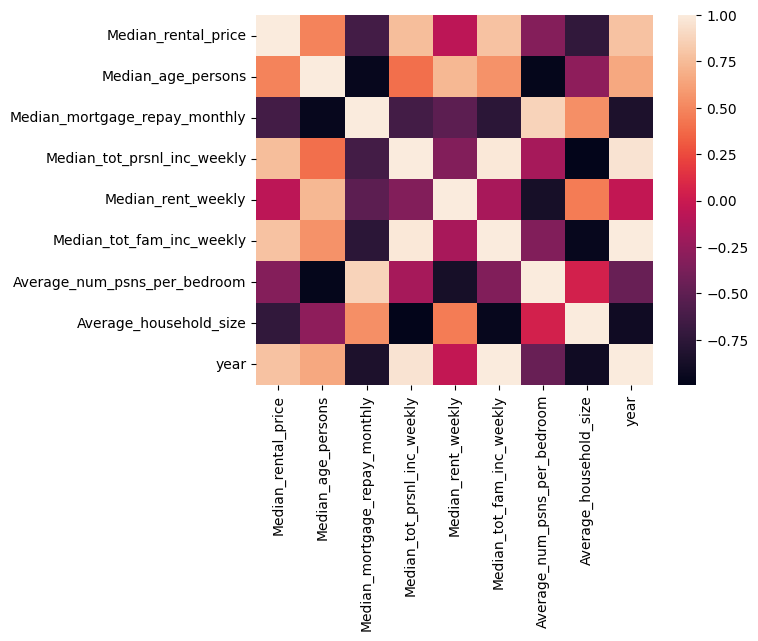

In [20]:
sns.heatmap(X_df.corr())

In [22]:
X_df

,Median_rental_price,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Average_household_size,year
0,315,36.0,1745.656006,600.352556,320.322337,1628.808864,1.100000,2.900000,2011
1,328,36.6,1718.707983,585.844443,334.679861,1661.613557,1.006667,3.013333,2012
2,330,36.7,1711.611505,628.384025,334.550495,1732.435832,0.996667,2.893333,2013
3,320,36.8,1704.515028,670.923608,334.421129,1803.258106,0.986667,2.773333,2014
4,320,36.9,1697.418550,713.463190,334.291763,1874.080381,0.976667,2.653333,2015
5,325,38.0,1650.618982,641.907382,363.136176,1868.867492,0.800000,3.000000,2016
6,340,37.1,1683.225595,798.542354,334.033032,2015.724930,0.956667,2.413333,2017
7,350,37.2,1676.129117,841.081936,333.903666,2086.547204,0.946667,2.293333,2018
8,350,37.3,1669.032639,883.621518,333.774300,2157.369479,0.936667,2.173333,2019
9,370,37.4,1661.936161,926.161101,333.644934,2228.191754,0.926667,2.053333,2020


<AxesSubplot:xlabel='year', ylabel='Average_household_size'>

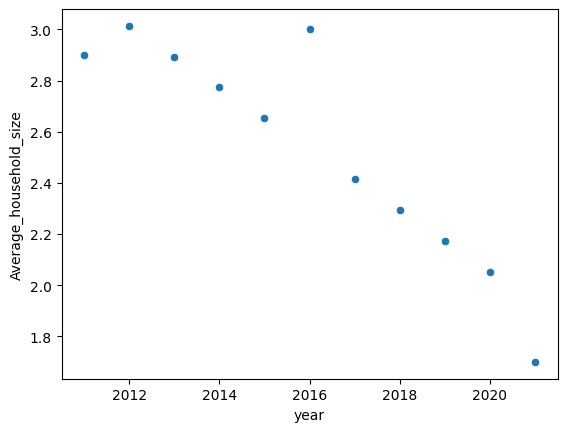

In [53]:
sns.scatterplot(data = X_df, x='year', y='Average_household_size')

In [49]:
reg = LinearRegression().fit(X_df.iloc[:, 1:9], X_df['Median_rental_price'])

In [50]:
reg.coef_

array([-8.61102793e+09, -3.26138958e+11,  1.16501190e+11, -2.58854708e+11,
       -1.03282632e+11,  2.12219048e+09, -1.33666298e+09,  1.15960811e+10])

In [93]:
X_df

,Median_rental_price,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Average_household_size,year
0,315,36.0,1745.656006,600.352556,320.322337,1628.808864,1.100000,2.900000,2011
1,328,36.6,1718.707983,585.844443,334.679861,1661.613557,1.006667,3.013333,2012
2,330,36.7,1711.611505,628.384025,334.550495,1732.435832,0.996667,2.893333,2013
3,320,36.8,1704.515028,670.923608,334.421129,1803.258106,0.986667,2.773333,2014
4,320,36.9,1697.418550,713.463190,334.291763,1874.080381,0.976667,2.653333,2015
5,325,38.0,1650.618982,641.907382,363.136176,1868.867492,0.800000,3.000000,2016
6,340,37.1,1683.225595,798.542354,334.033032,2015.724930,0.956667,2.413333,2017
7,350,37.2,1676.129117,841.081936,333.903666,2086.547204,0.946667,2.293333,2018
8,350,37.3,1669.032639,883.621518,333.774300,2157.369479,0.936667,2.173333,2019
9,370,37.4,1661.936161,926.161101,333.644934,2228.191754,0.926667,2.053333,2020


# These are the features use to predict future prices

In [26]:
X_df.iloc[:, 1:8]

,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Average_household_size
0,36.0,1745.656006,600.352556,320.322337,1628.808864,1.100000,2.900000
1,36.6,1718.707983,585.844443,334.679861,1661.613557,1.006667,3.013333
2,36.7,1711.611505,628.384025,334.550495,1732.435832,0.996667,2.893333
3,36.8,1704.515028,670.923608,334.421129,1803.258106,0.986667,2.773333
4,36.9,1697.418550,713.463190,334.291763,1874.080381,0.976667,2.653333
5,38.0,1650.618982,641.907382,363.136176,1868.867492,0.800000,3.000000
6,37.1,1683.225595,798.542354,334.033032,2015.724930,0.956667,2.413333
7,37.2,1676.129117,841.081936,333.903666,2086.547204,0.946667,2.293333
8,37.3,1669.032639,883.621518,333.774300,2157.369479,0.936667,2.173333
9,37.4,1661.936161,926.161101,333.644934,2228.191754,0.926667,2.053333


### Creating future data from regression.

In [23]:
future_yrs = [2022,2023,2024,2025]
reg_forecast = pd.DataFrame()
for col in X_df.iloc[:, 1:8]:
    l = []
    reg = LinearRegression().fit(X_df['year'].values.reshape((-1,1)), X_df[col].values.reshape((-1,1)))
    for yr in future_yrs:
        l.extend(reg.predict(np.array([[yr]])))
        row = [np.round(x[0], 1) for x in l]
#         print(l)
    reg_forecast[col] = row
reg_forecast['year'] = future_yrs

In [24]:
reg_forecast

,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Average_household_size,year
0,37.6,1647.7,1011.2,333.4,2369.8,0.9,1.8,2022
1,37.7,1640.6,1053.8,333.3,2440.7,0.9,1.7,2023
2,37.8,1633.6,1096.3,333.1,2511.5,0.9,1.6,2024
3,37.9,1626.5,1138.9,333.0,2582.3,0.9,1.5,2025


In [25]:
X_df.iloc[:, 1:9]

,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Average_household_size,year
0,36.0,1745.656006,600.352556,320.322337,1628.808864,1.100000,2.900000,2011
1,36.6,1718.707983,585.844443,334.679861,1661.613557,1.006667,3.013333,2012
2,36.7,1711.611505,628.384025,334.550495,1732.435832,0.996667,2.893333,2013
3,36.8,1704.515028,670.923608,334.421129,1803.258106,0.986667,2.773333,2014
4,36.9,1697.418550,713.463190,334.291763,1874.080381,0.976667,2.653333,2015
5,38.0,1650.618982,641.907382,363.136176,1868.867492,0.800000,3.000000,2016
6,37.1,1683.225595,798.542354,334.033032,2015.724930,0.956667,2.413333,2017
7,37.2,1676.129117,841.081936,333.903666,2086.547204,0.946667,2.293333,2018
8,37.3,1669.032639,883.621518,333.774300,2157.369479,0.936667,2.173333,2019
9,37.4,1661.936161,926.161101,333.644934,2228.191754,0.926667,2.053333,2020


In [126]:
X_df['Median_rental_price']

0     315
1     328
2     330
3     320
4     320
5     325
6     340
7     350
8     350
9     370
10    340
Name: Median_rental_price, dtype: int64

<AxesSubplot:xlabel='year', ylabel='Median_rental_price'>

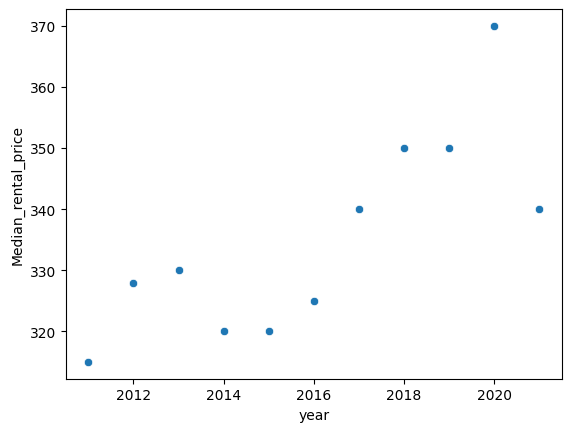

In [129]:
sns.scatterplot(data = X_df, x='year', y='Median_rental_price')

<AxesSubplot:xlabel='Median_tot_prsnl_inc_weekly', ylabel='Median_rental_price'>

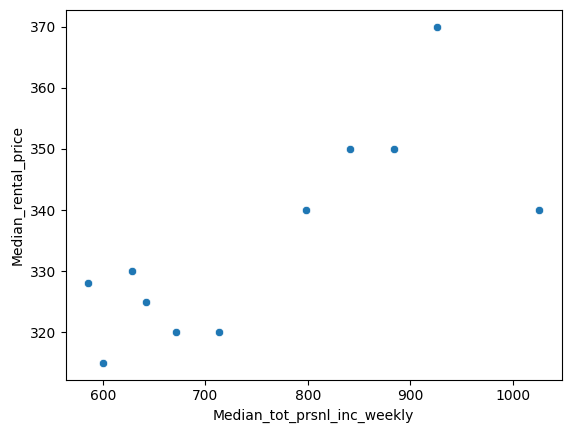

In [131]:
sns.scatterplot(data = X_df, x='Median_tot_prsnl_inc_weekly', y='Median_rental_price')

<AxesSubplot:xlabel='Average_household_size', ylabel='Median_rental_price'>

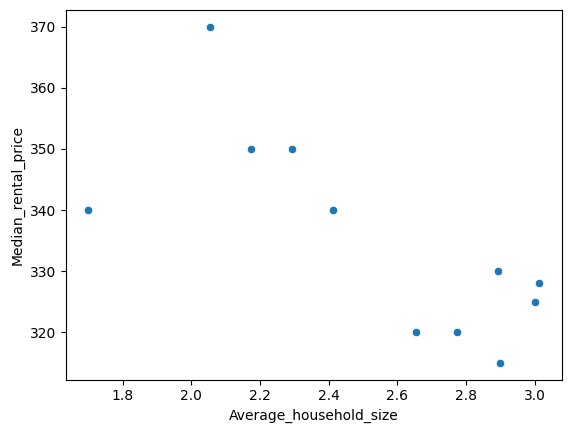

In [132]:
sns.scatterplot(data = X_df, x='Average_household_size', y='Median_rental_price')

In [2]:
from scipy import stats

In [153]:
X_df.iloc[:,[1,2,3,7]]

,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Average_household_size
0,36.0,1745.656006,600.352556,2.900000
1,36.6,1718.707983,585.844443,3.013333
2,36.7,1711.611505,628.384025,2.893333
3,36.8,1704.515028,670.923608,2.773333
4,36.9,1697.418550,713.463190,2.653333
5,38.0,1650.618982,641.907382,3.000000
6,37.1,1683.225595,798.542354,2.413333
7,37.2,1676.129117,841.081936,2.293333
8,37.3,1669.032639,883.621518,2.173333
9,37.4,1661.936161,926.161101,2.053333


In [145]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Median_rental_price            11 non-null     int64  
 1   Median_age_persons             11 non-null     float64
 2   Median_mortgage_repay_monthly  11 non-null     float64
 3   Median_tot_prsnl_inc_weekly    11 non-null     float64
 4   Median_rent_weekly             11 non-null     float64
 5   Median_tot_fam_inc_weekly      11 non-null     float64
 6   Average_num_psns_per_bedroom   11 non-null     float64
 7   Average_household_size         11 non-null     float64
 8   year                           11 non-null     int64  
dtypes: float64(7), int64(2)
memory usage: 920.0 bytes


In [141]:
reg_forecast

,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Average_household_size,year
0,37.6,1647.7,1011.2,333.4,2369.8,0.9,1.8,2022
1,37.7,1640.6,1053.8,333.3,2440.7,0.9,1.7,2023
2,37.8,1633.6,1096.3,333.1,2511.5,0.9,1.6,2024
3,37.9,1626.5,1138.9,333.0,2582.3,0.9,1.5,2025


In [158]:
reg_forecast.iloc[:,[0,1,2,6]]

,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Average_household_size
0,37.6,1647.7,1011.2,1.8
1,37.7,1640.6,1053.8,1.7
2,37.8,1633.6,1096.3,1.6
3,37.9,1626.5,1138.9,1.5


In [157]:
X_df.iloc[:,[1,2,3,7]]

,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Average_household_size
0,36.0,1745.656006,600.352556,2.900000
1,36.6,1718.707983,585.844443,3.013333
2,36.7,1711.611505,628.384025,2.893333
3,36.8,1704.515028,670.923608,2.773333
4,36.9,1697.418550,713.463190,2.653333
5,38.0,1650.618982,641.907382,3.000000
6,37.1,1683.225595,798.542354,2.413333
7,37.2,1676.129117,841.081936,2.293333
8,37.3,1669.032639,883.621518,2.173333
9,37.4,1661.936161,926.161101,2.053333


In [154]:
reg = LinearRegression().fit(X_df.iloc[:,[1,2,3,7]], X_df['Median_rental_price'])

In [159]:
reg.predict(reg_forecast.iloc[:,[0,1,2,6]])

array([358.89473491, 362.8356999 , 366.75480596, 370.69577096])

In [148]:
X_df.to_csv("../data/curated/Albert_park_test.csv", index = False)
reg_forecast.to_csv("../data/curated/Albert_park_test_y.csv", index = False)